<font style='font-size:1.5em'>**👨🏻‍🏫 Week 05 lab – Web Scraping practice** </font>

<font style='font-size:1.2em'>DS105W – Data for Data Science</font>

**AUTHORS:**  Dr. [Jon Cardoso-Silva](https://jonjoncardoso.github.io)

**DEPARTMENT:** [LSE Data Science Institute](https://lse.ac.uk/dsi)

**OBJECTIVE**: Continue from where we left off in W04 lecture + a few more things




---

# Part 0: Export your chat logs (~ 3 min)

As part of the <span style="font-weight:bold"> ![](/figures/icons/GENIAL_favicon.png){width=1em} GEN<font color='#D55816'>IA</font>L</span> project, we ask that you fill out the following form as soon as you come to the lab:

🎯 **ACTION POINTS**

1. 🔗 [**CLICK HERE**](https://forms.office.com/e/689MersZzV) to export your chat log.

    Thanks for being GENIAL! You are now one step closer to earning some prizes! 🎟️





# Part I: ⚙️ The setup

You will need to install the requests and Scrapy packages in order to complete this lab. I will assume you have configured the virtual environment for this course as follows. 



Open the terminal (directly from within VS Code will be easier) and run each of the following commands:


```bash
pip install pandas requests scrapy
```


In [ ]:
import requests               # This is how we access the web
import pandas as pd           # This is how we work with data frames

from pprint import pprint     # Print things in a pretty way
from scrapy import Selector   # This is how we parse HTML

# Part I: An important recap (20 min)

**🧑‍🏫 TEACHING MOMENT:** Your class teacher will recap the essentials of HTML as well as `requests` and `scrapy` with you.


<details><summary style="display: list-item;cursor: pointer;"><h2 style="display:inline;border-bottom: 1px solid #dee2e6;padding-bottom: .5rem;opacity: .9;margin-left:1rem;font-weight: 300;font-size:1.5rem;font-family: 'News Cycle','Arial Narrow Bold',sans-serif;line-height: 1.1;vertical-align:middle;">1. HTML in brief</h2></summary>

- You learned that **HTML files are structured into [tags](https://www.w3schools.com/TAGs/) (or elements)**. Each tag carries a specific meaning, allowing browsers to display the information accurately. 

    - For example, a `<p></p>` tells the browser, 'This is a paragraph,' 
    
    - whereas a `<div></div>` tag tells the browser, 'this is a box of elements'.

- HTML tags can have **attributes**.

    - For example, whenever we add a link (`<a>`), we need to specify the location where this link is pointing to (`href`):

        ```html
        <a href="https://lse-dsi.github.io/DS105">DS105 main page</a>
        ```

</details>

<details><summary style="display: list-item;cursor: pointer;"><h2 style="display:inline;border-bottom: 1px solid #dee2e6;padding-bottom: .5rem;opacity: .9;margin-left:1rem;font-weight: 300;font-size:1.5rem;font-family: 'News Cycle','Arial Narrow Bold',sans-serif;line-height: 1.1;vertical-align:middle;">2. Styling (CSS) in brief</h2></summary>

You also learned that one can apply **styles** to a tag using a language called CSS.

- Styles can appear **inline**, as specified by the `style` attribute: 

    ```html
    <p style="margin-bottom:10px;background-color:red;color:white">Some text</p>
    ```

- But styles can also be specified separately via a `.css` file. In that file, one uses **CSS Selectors** to identify which tags should be styled and how. For example, if I want _all_ my `<p>` tags to have the same style, I'd write:

    ```css
    p {
        margin-bottom:10px;
        background-color:red;
        color:white
    }
    ```

    When I load this CSS file into my HTML, the styling above will apply to all `<p>`s.

    For the above to work, I'd have to add the following to my HTML document:

    ```html
    <html>
        <head>
            <link rel="stylesheet" type="text/css" href="your_css_file.css">
        </head>

        <body>
            ...
        </body>
    </html>
    ```

</details>



<details><summary style="display: list-item;cursor: pointer;"><h2 style="display:inline;border-bottom: 1px solid #dee2e6;padding-bottom: .5rem;opacity: .9;margin-left:1rem;font-weight: 300;font-size:1.5rem;font-family: 'News Cycle','Arial Narrow Bold',sans-serif;line-height: 1.1;vertical-align:middle;">3. The class attribute</h2></summary>

A class can be applied to style multiple elements at once. 

```html
<p class="coloured"></p>
```

The way to specify the style of a class using **CSS selectors** is with a dot (`.`).  

For example, the class above can be specified in my CSS file as:

```css
p.coloured{
    ...<some-styling>...
}
```

or simply:

```css
.coloured{
    ...<some-styling>...
}
```


</details>



<details><summary style="display: list-item;cursor: pointer;"><h2 style="display:inline;border-bottom: 1px solid #dee2e6;padding-bottom: .5rem;opacity: .9;margin-left:1rem;font-weight: 300;font-size:1.5rem;font-family: 'News Cycle','Arial Narrow Bold',sans-serif;line-height: 1.1;vertical-align:middle;">4. The id attribute</h2></summary>

An `id` is a unique identifier or an element. It should only appear once in a page. We specify ids with the 'hashtag' symbol (`#`).

Therefore, if I have a 

```html
<p id="uniquely-huge">
```

I could specify the **CSS selector** as:

```css
p#uniquely-huge {
    ...<some-styling>...
}
``` 

or simply:

```css
#uniquely-huge {
    ...<some-styling>...
}
```

(we don't even need to specify the tag)

</details>



<details><summary style="display: list-item;cursor: pointer;"><h2 style="display:inline;border-bottom: 1px solid #dee2e6;padding-bottom: .5rem;opacity: .9;margin-left:1rem;font-weight: 300;font-size:1.5rem;font-family: 'News Cycle','Arial Narrow Bold',sans-serif;line-height: 1.1;vertical-align:middle;">5. A full example with classes and id</h2></summary>

Take, for example, the following HTML document:

```html
<html>
    <head>
        <link rel="stylesheet" type="text/css" href="my_styles.css">
    </head>

    <body>
        <p>Some text</p>

        <p class="coloured">Some text with coloured background</p>

        <p class="coloured">Some text with coloured background</p>

        <p id="uniquely-huge" class="coloured"></p>
    </body>
</html>
```

Suppose we also have a `my_styles.css` file as below:

```css
p {
    margin-bottom:10px;
}

p.coloured {
    background-color:red;
    color:white
}

#uniquely-huge {
    font-size: 2em;
}
```

This will render as:

![Screenshot 2024-02-11 130802.png](<attachment:Screenshot 2024-02-11 130802.png>){style="width:30%"}

</details>



    


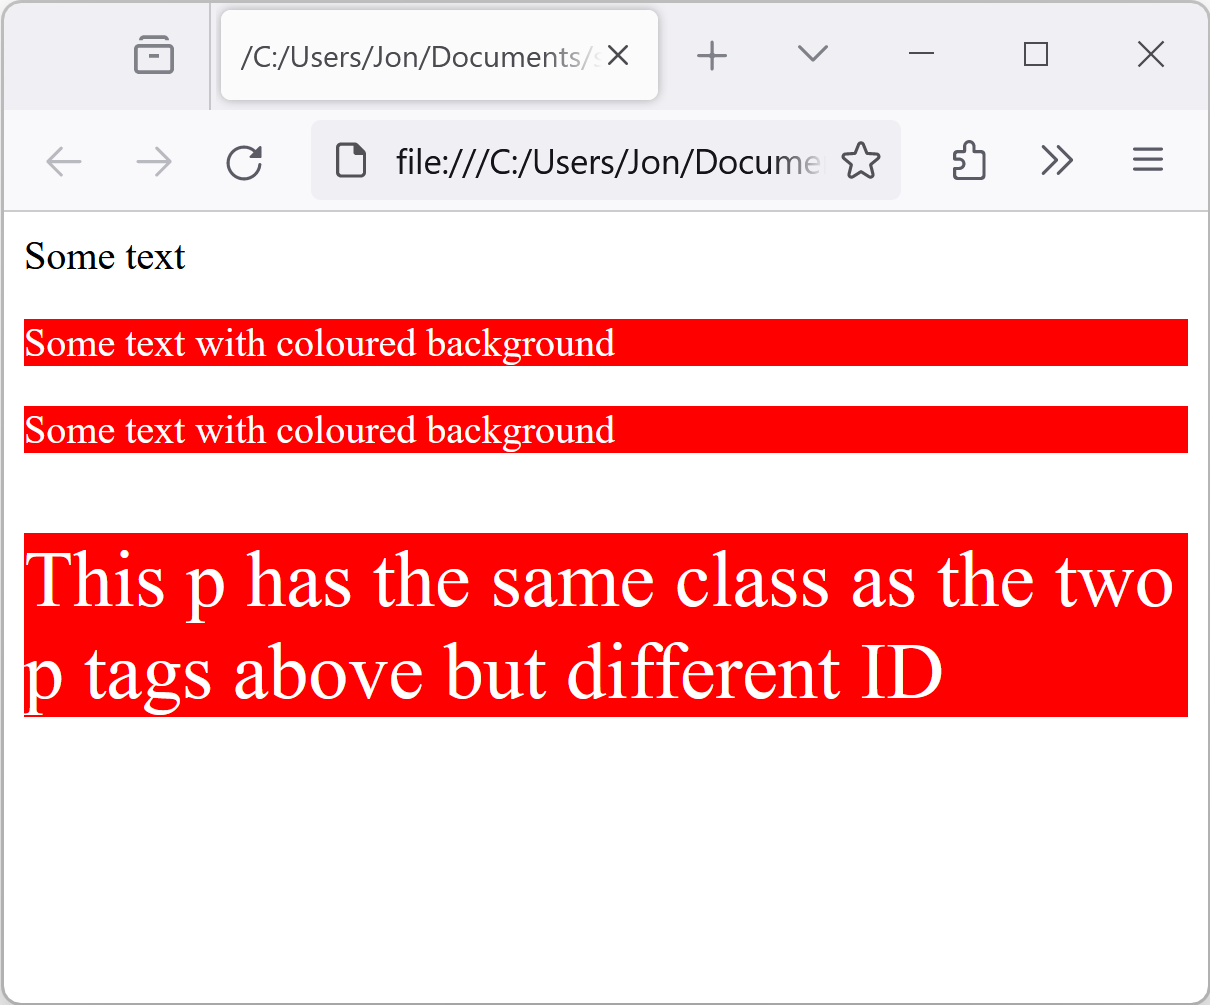

<details><summary style="display: list-item;cursor: pointer;"><h2 style="display:inline;border-bottom: 1px solid #dee2e6;padding-bottom: .5rem;opacity: .9;margin-left:1rem;font-weight: 300;font-size:1.5rem;font-family: 'News Cycle','Arial Narrow Bold',sans-serif;line-height: 1.1;vertical-align:middle;">6. Using CSS selectors for web scraping</h2></summary>

In brief, when collecting data from a public webpage, this is a skeleton what you need:

```python
response = requests.get('<some-url>')
sel = Selector(response.text)
sel.css('<your-css-selector>')
```
You can also refer to your W04 lecture notebook to remember the full syntax. The key for the rest of this lab is identifying what must be written in the `<your-css-selector>`. 

- You learned that you can include the names of specific tags directly. For example, `sel.css('h3').extract_all()` will return a list of all H3 in the entire page
- You also learned that you can find the closest **container** (say, `div.card-box`) and then scrape the contents of this box later.

<details><summary style="display: list-item;cursor: pointer;"><h2 style="display:inline;border-bottom: 1px solid #dee2e6;padding-bottom: .5rem;margin-left:1rem;font-weight: 300;font-size:1.5rem;font-family: 'News Cycle','Arial Narrow Bold',sans-serif;line-height: 1.1;vertical-align:middle;color:#c89020">7. CSS selectors cheatsheet ⭐</h2></summary> 

<div style="margin-top:1.5em;width:80%;font-size:0.9em;">

| Selector              | Example                  | Use Case Scenario                                                                                                                              |
|-----------------------|--------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------|
| *                     | *                        | This selector picks all elements within a page. It’s not that different from a page. Not much use for it but still good to know                |
| .class                | .card-title              | The simplest CSS selector is targeting the class attribute. If only your target element is using it, then it might be sufficient.            |
| .class1.class2        | .card-heading.card-title | There are elements with a class like class=“card-heading card-title”. When we see a space, it is because the element is using several classes. However, there’s no one fixed way of selecting the element. Try keeping the space, if that doesn’t work, then replace the space with a dot. |
| #id                   | #card-description        | What if the class is used in too many elements or if the element doesn’t have a class? Picking the ID can be the next best thing. The only problem is that IDs are unique per element. So won’t cut to scrape several elements at once.                   |
| element               | h4                       | To pick an element, all we need to add to our parser is the HTML tag name.                                                                  |
| element.class         | h4.card-title            | This is the most common we’ll be using in our projects.                                                                                      |
| parentElement > childElement | div > h4          | We can tell our scraper to extract an element inside another. In this example, we want it to find the h4 element whose parent element is a div.                                                             |
| parentElement.class > childElement | div.card-body > h4 | We can combine the previous logic to specify a parent element and extract a specific CSS child element. This is super useful when the data we want doesn’t have any class or ID but is inside a parent element with a unique class/ID. |
| [attribute]           | [href]                   | Another great way to target an element with no clear class to choose from. Your scraper will extract all elements containing the specific attribute. In this case, it will take all <a> tags which are the most common element to contain an href attribute. |
| [attribute=value]     | [target=_blank]          | We can tell our scraper to extract only the elements with a specific value inside its attribute.                                              |
| element[attribute=value] | a[rel=next]          | This is the selector we used to add a crawling feature to our Scrapy script: next_page = response.css(‘a[rel=next]’).attrib[‘href’] The target website was using the same class for all its pagination links so we had to come up with a different solution. |
| [attribute~=value]    | [title~=rating]         | This selector will pick all the elements containing the word ‘rating’ inside its title attribute.                                             |

</div>

Source: [The Only CSS Selectors Cheat Sheet You Need for Web Scraping](https://www.scraperapi.com/blog/css-selectors-cheat-sheet/#CSS-Selectors-Cheat-Sheet)

</details>

💡 PRO-TIP: Did you notice that we're using a mix of markdown + HTML in this Jupyter notebook?

# Part II: Time to put all of this into practice (60-70 min)

Now go over the action points below in pairs:

🎯 **ACTION POINTS**

1. Go to the [Data Science Seminar series](https://socialdatascience.network/index.html#schedule) website and inspect the page (mouse right-click + Inspect) and find the way to the name of the first event on the page. 


2. Write down the **full** "directions" inside the HTML file to reach the event title. For example, maybe you will find that:

    > _The first event title is inside a \<html\> ➡️ \<div\> ➡️ \<div\> ➡️ \<h6\> tag_.

    Write it in the markdown cell below:

_Delete this line and write your answer here_

3. Write the required Python code to scrape the CSS selector you identified above. 

    - Don't use the notion of containers just yet - we will practice that later in the W05 lecture. 
    - For now, just write the full CSS selector you identified above


In [ ]:
# Delete this line and replace it with your code

4. **Let's simplify.** Let's capture the title of the **first event** again, but instead of writing the entire full absolute path, like above, identify a more direct way to capture it. 

    - Note: Either use scrapy's `.extract_first()` or use `extract()` and later filter the list using regular  Python

In [ ]:
# Delete this line and replace it with your code

5. **Collect all the titles**. OK, now let's practice getting all event titles from the entire page. Save the titles into a list.

    **NOTE:** Again, collect all the information from the webpage at once. Don't use the notion of containers just yet. We will practice it in the W05 lecture.

In [ ]:
# Delete this line and replace it with your code

6. Do the same with the dates of the events and speaker names and save them to separate lists. 

    **NOTE:** Again, collect all the information from the webpage at once. Don't use the notion of containers just yet. We will practice it in the W05 lecture.


In [ ]:
# Delete this line and replace it with your code

7. 🥇 **Challenge:** Combine all these lists you captured above into a single pandas data frame and save it to a CSV file. 

    Tip 1: Say you have lists called `dates`, `titles`, `speakers`, you can create a data frame (a table) like this:
    
    ```python
    df = pd.DataFrame({'date': dates,
                       'title': titles,
                       'speakers': speakers})
    ```    
    
    Tip 2: What if an event does not have a date or speaker name? Set that particular event's date or speaker to `None`

In [ ]:
# Delete this line and replace it with your code

8. Double-check that the CSV file was created correctly by opening it using pandas. Then convert the columns to appropriate data types.

In [ ]:
# Delete this line and replace it with your code

----

If there is some time left, use it to work on your 📝 [W06 Summative](https://lse-dsi.github.io/DS105/2023/winter-term/assessments/w06-summative.html)